In [5]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/')
from simple_fc import Encoder,Decoder
from cvae import Conditional_Variational_Autoencoder
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from tensorflow.python.framework import dtypes
from tensorflow.contrib.learn.python.learn.datasets.mnist import read_data_sets, DataSet
mnist = read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# Remove all but the first n_save images of a digit
n = mnist.train.num_examples
n_save = 10
digit = 8
x, y = mnist.train.next_batch(n)
print x.shape[0]
idx = np.where((y[:, digit] == 1))[0]
idx = idx[n_save:]
print len(idx)
x_removed = np.delete(x, idx, axis=0)
print x_removed.shape[0]
y_removed = np.delete(y, idx, axis=0)
dataset = DataSet(x_removed, y_removed, dtype=dtypes.float32, reshape=False)

55000
5379
49621


In [17]:
tf.reset_default_graph()

In [ ]:
# Training
#sess = tf.InteractiveSession()
#build_encoder = Encoder(100)
#build_decoder = Decoder(100)
#model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
#                                            z_dim = 20,img_dim = 784,dataset = dataset,
#                                            learning_rate = 0.001, num_epochs = 50,
#                                           condition_on_label=True,
#                                            checkpoint_name = 'cvae_label_restricted_checkpoint')
#model.train()

In [18]:
# Load checkpoint
sess = tf.InteractiveSession()
build_encoder = Encoder(100)
build_decoder = Decoder(100)
model = Conditional_Variational_Autoencoder(sess, build_encoder, build_decoder, batch_size = 100,
                                            z_dim = 20,img_dim = 784,dataset = dataset,
                                            learning_rate = 0.001, num_epochs = 50,
                                           condition_on_label=True,
                                            load = True, load_file = 'checkpoints/cvae_label_restricted_checkpoint')

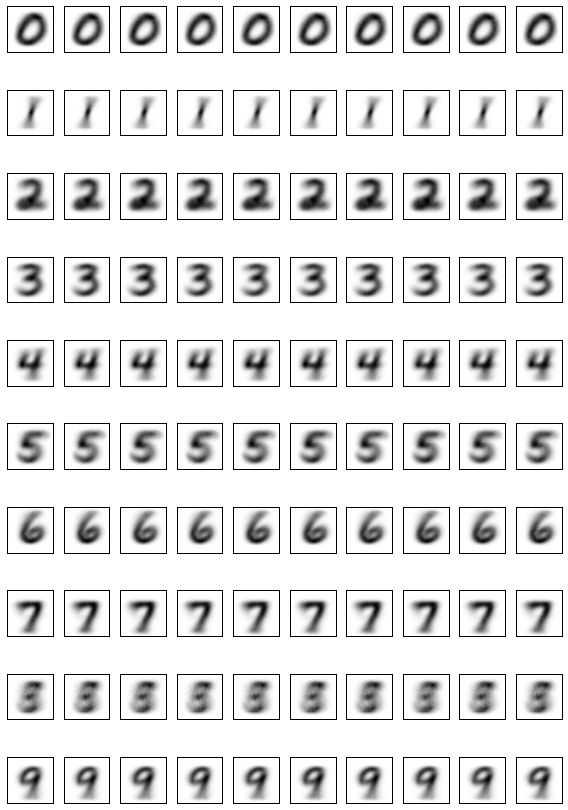

In [14]:
#images, info = mnist.test.next_batch(100)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)

num_show = 5
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
plt.savefig('images/by_label_restricted')
plt.show()

In [16]:
sess.close()
tf.reset_default_graph()